In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

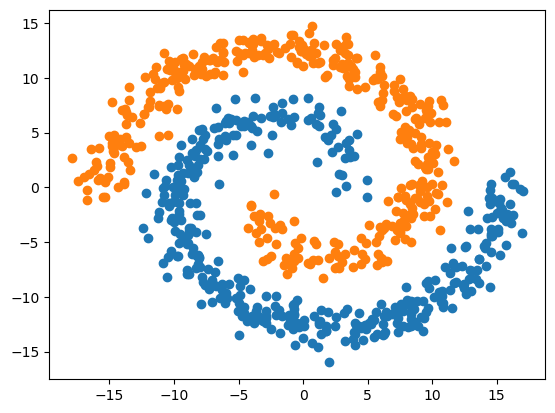

In [2]:
from numpy import pi
N = 400
theta = np.sqrt(np.random.rand(N))*2*pi # np.linspace(0,2*pi,100)

r_a = 2*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)

r_b = -2*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)

res_a = np.append(x_a, np.zeros((N,1)), axis=1)
res_b = np.append(x_b, np.ones((N,1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

np.savetxt("spiral_data.csv", res, delimiter=",", header="x,y,label", comments="", fmt='%.5f')

plt.scatter(x_a[:,0],x_a[:,1])
plt.scatter(x_b[:,0],x_b[:,1])
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_circular_data(num_samples, num_classes):
    angles = np.linspace(0, 2*np.pi, num_classes+1)[:-1]
    centers = np.column_stack((np.cos(angles), np.sin(angles)))
    labels = np.repeat(np.arange(num_classes), num_samples//num_classes)
    data = np.zeros((num_samples, 2))
    for i in range(num_classes):
        start, end = i*num_samples//num_classes, (i+1)*num_samples//num_classes
        r = np.random.uniform(size=(end-start,))
        angles = np.random.uniform(low=0, high=2*np.pi, size=(end-start,))
        data[start:end] = centers[i] + np.column_stack((r*np.cos(angles), r*np.sin(angles)))
    return data, labels

In [4]:
import numpy as np
from scipy.stats import multivariate_normal
"""
E-step: Compute the responsibility of each Gaussian component for each data point. 
The responsibility <- probability that the data point belongs to the component, given the current parameter estimates. 
Bayes' rule: responsibilities[i, j] = weights[i] * p(X[j] | means[i], covs[i]) / sum_k(weights[k] * p(X[j] | means[k], covs[k]))
where responsibilities is an n_samples-by-self.k matrix of responsibilities, weights is a self.k-dimensional vector of component weights,
 p(X[j] | means[i], covs[i]) is the probability density of the jth data point under the ith Gaussian component, 
 and sum_k(...) is the sum over all self.k components.

M-step: Update the parameters of each Gaussian component based on the responsibilities of the data points. 
The new estimates of the component weights, means, and covariance matrices can be computed as follows:
  weights[i] = sum_j(responsibilities[i, j]) / n_samples
  means[i] = sum_j(responsibilities[i, j] * X[j]) / sum_j(responsibilities[i, j])
  covs[i] = sum_j(responsibilities[i, j] * (X[j] - means[i]).T.dot(X[j] - means[i])) / sum_j(responsibilities[i, j])
where sum_j(...) is the sum over all n_samples data points.
"""
class GMM:
    def __init__(self, k, max_iter=100):
        self.k = k
        self.max_iter = max_iter
        self.means = None
        self.covs = None
        self.weights = None
    
    def fit_predict(self, X):
        n_samples, n_features = X.shape
        # Initialization
        # means are randomly generation of size samples x clusters
        # covariance matrix is genera
        self.means = X[np.random.choice(n_samples, self.k, replace=False)]
        #we assume that the variables in each component are uncorrelated and have equal variance
        self.covs = np.array([np.eye(n_features)] * self.k)
        # equal weights to all components
        self.weights = np.array([1 / self.k] * self.k)
        
        for _ in range(self.max_iter):
            # E-step
            probabilities = np.zeros((n_samples, self.k))
            for i in range(self.k):
                probabilities[:, i] = self.weights[i] * multivariate_normal.pdf(X, mean=self.means[i], cov=self.covs[i])
            labels = np.argmax(probabilities, axis=1)
            
            # M-step
            for i in range(self.k):
                mask = (labels == i)
                self.weights[i] = np.sum(mask) / n_samples
                if np.sum(mask) > 0:
                    self.means[i] = np.mean(X[mask], axis=0)
                    diff = X[mask] - self.means[i]
                    self.covs[i] = np.dot(diff.T, diff) / np.sum(mask)
        
        return labels

In [5]:
colors = ['r', 'b' ,'g', 'y', 'c', 'm']


semi-supervised: 


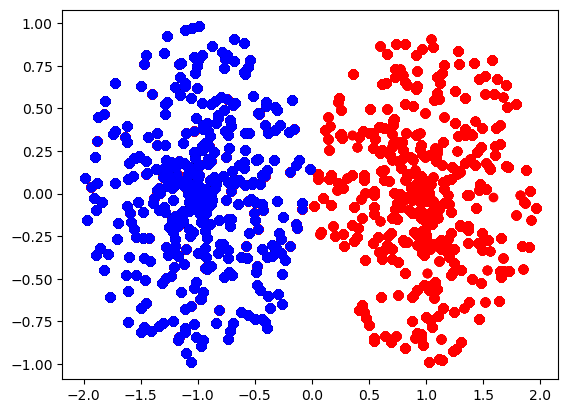

In [6]:
from sklearn.cluster import KMeans

# Semi-supervised learning
print("\nsemi-supervised: ")
num_samples = 800
num_classes = 2
data, labels = generate_circular_data(num_samples, num_classes)
# Cluster data with 2 clusters
gmm = GMM(k=2)
labels = gmm.fit_predict(data)
for i in range(800):
  plt.plot(data[i:,0] , data[i:,1] , 'o' , c = colors[labels[i]])


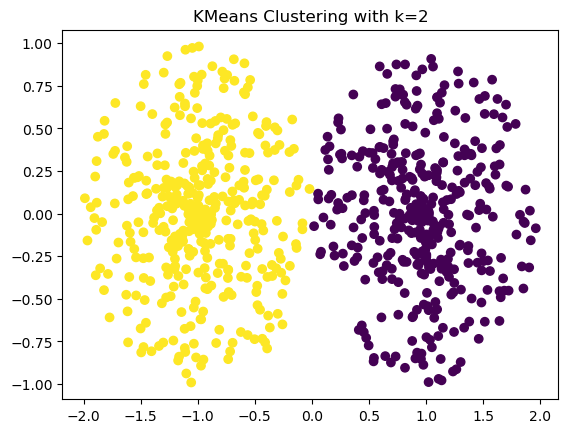

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [7]:
# Define the number of clusters
k = 2

# Train the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42).fit(data)

# Get the labels of each data point
labels = kmeans.labels_

# Plot the clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title("KMeans Clustering with k={}".format(k))
plt.show()
plt.figure(figsize=(8,6))

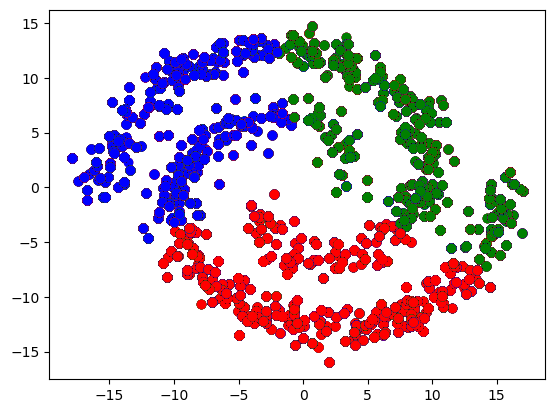

In [8]:
data = pd.read_csv("spiral_data.csv")
data = data.values[:,:2]
gmm = GMM(k=3)
labels = gmm.fit_predict(data)
for i in range(800):
  plt.plot(data[i:,0] , data[i:,1] , 'o' , c = colors[labels[i]])

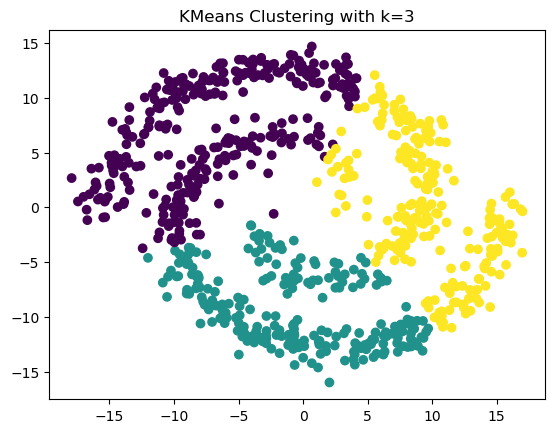

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [9]:
# Define the number of clusters
k = 3

# Train the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42).fit(data)

# Get the labels of each data point
labels = kmeans.labels_

# Plot the clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title("KMeans Clustering with k={}".format(k))
plt.show()
plt.figure(figsize=(8,6))

In [11]:
d = generate_circular_data(800, 4)

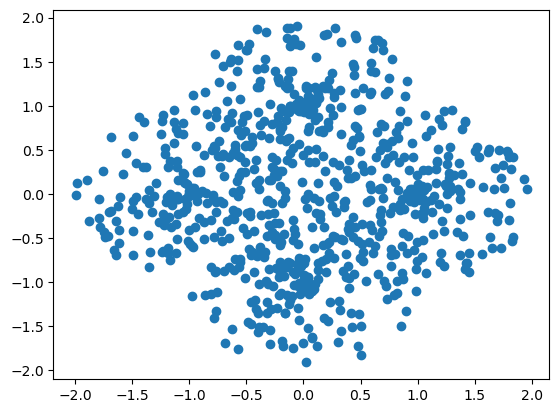

In [14]:
plt.plot(d[0][:,0] , d[0][:,1] , 'o')

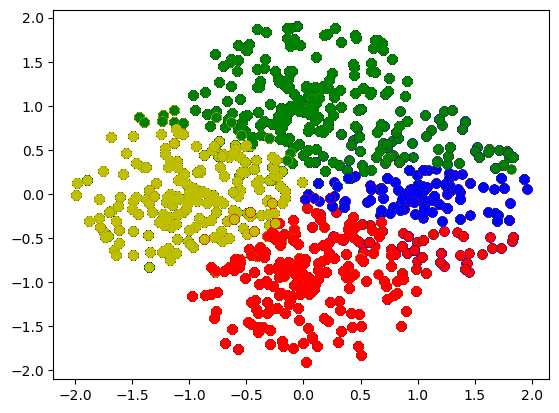

In [17]:
gmm = GMM(k=4)
labels = gmm.fit_predict(d[0])
for i in range(800):
  plt.plot(d[0][i:,0] , d[0][i:,1] , 'o' , c = colors[labels[i]])

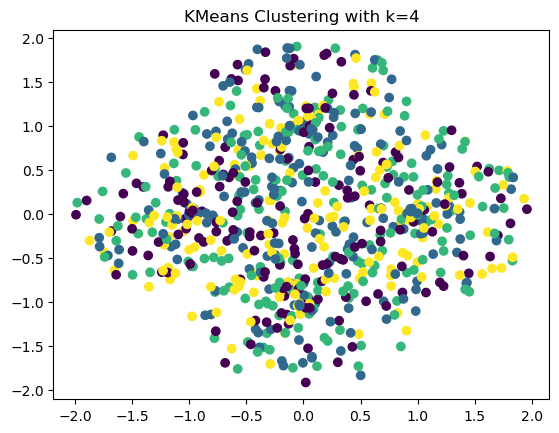

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [25]:
# Define the number of clusters
k = 4

# Train the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42).fit(data)

# Get the labels of each data point
labels = kmeans.labels_

# Plot the clusters
plt.scatter(d[0][:, 0], d[0][:, 1], c=labels, cmap='viridis')
plt.title("KMeans Clustering with k={}".format(k))
plt.show()
plt.figure(figsize=(8,6))